<a href="https://colab.research.google.com/github/denisakatov/deep_comp_vision/blob/main/deep_vision_hm_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В ноутбуке поэкспериментировал с обрезанием изображения, изменением пикселей, переводом в формат hsv и обратно, применял различные фильтры, бинаризацию по порогу в цикле

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

In [32]:
source = '/content/182147_00_2x.jpg'

In [33]:
image = imageio.imread(source)

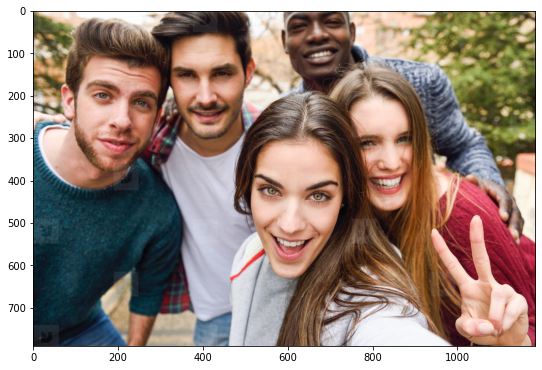

In [34]:
plt.figure(figsize = (9,9))
plt.imshow(image)

Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.



In [35]:
# Скопируем картинку
image1 = np.copy(image)

In [36]:
#  Именим слой green. Сделаем верхний правый угол черным в слое green
image1[:100, 100:, 1]  = 0

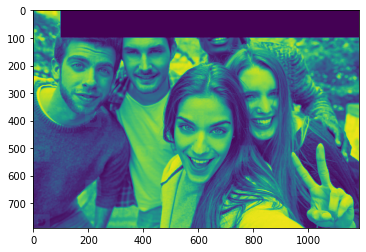

In [37]:
plt.imshow(image1[:,:,1])

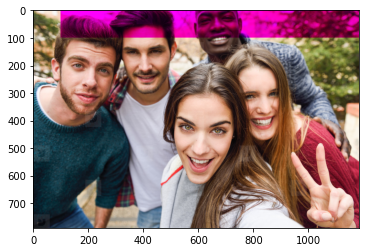

In [38]:
# И вся картинка
plt.imshow(image1)

Переведем все в hsv и обратно

In [57]:
from skimage.color import rgb2hsv, hsv2rgb

In [58]:
image2 = np.copy(image)

In [59]:
image2_rgb2hsv = rgb2hsv(image2)

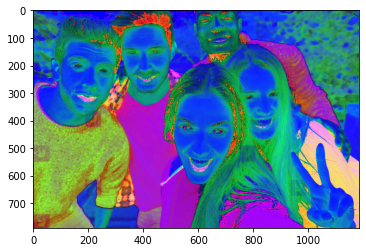

In [60]:
# Интереса ради посмотрим как обработает его plt.imshow
plt.imshow(image2_rgb2hsv)

In [61]:
# Изменим тон
image2_rgb2hsv[:,:,0] **= 2
image2_reversed = hsv2rgb(image2_rgb2hsv)

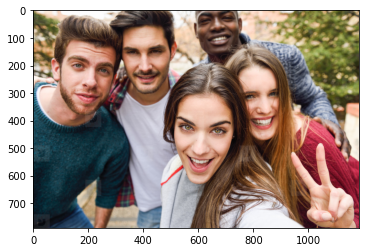

In [62]:
# Было
plt.imshow(image2)


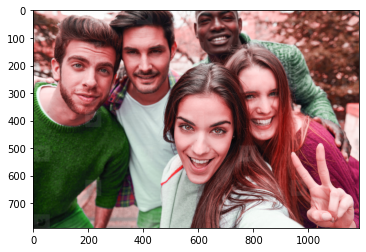

In [63]:
#Посмотрим результат
plt.imshow(image2_reversed)

Поиграем с интенсивностью

In [64]:
image2_rgb2hsv2 = rgb2hsv(image2)

In [66]:
image2_rgb2hsv2[:,:, 2] **= 0.5

In [69]:
image3_reversed = hsv2rgb(image2_rgb2hsv2)

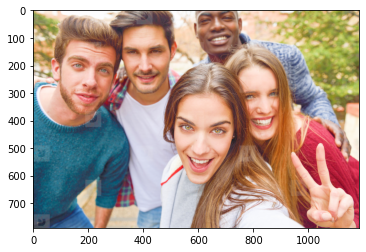

In [71]:
plt.imshow(image3_reversed)

Применим фильтры. Возьмем фильтры с урока по tensorflow

In [98]:
filter1 = np.array([ [-1, -1, -1], [0, 0, 0], [-1, -1, -1]])/9
# Фильтры края.

#Разные фильтры.
filter2 = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]
filter3 = np.random.randn(3,3)

# Много разных

filter4 = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
filter5 = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

filter_list = [filter1, filter2, filter3, filter4, filter5]

In [132]:
from scipy.signal import correlate2d as corr2

In [148]:
image4 = np.copy(image)
image4 = image4.astype(np.float32) / 255.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


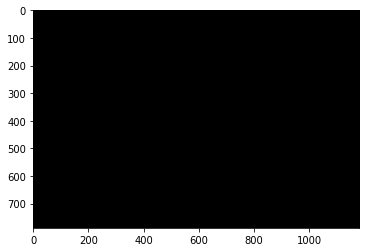

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


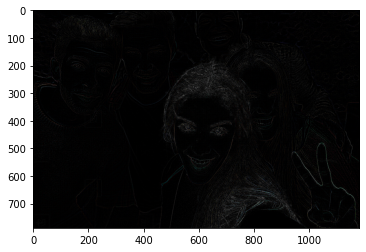

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


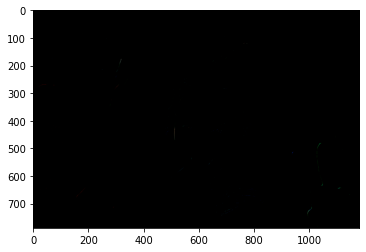

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


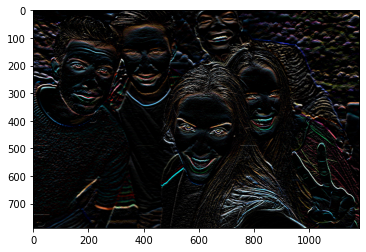

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


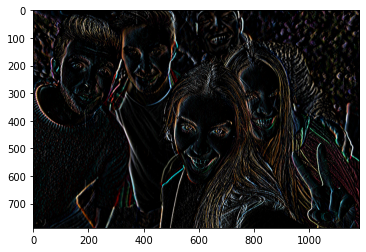

In [150]:
for f in filter_list:
    out_img = []
    for c in range(image4.shape[2]):
        out_img.append(corr2(image4[:,:,c], f, mode='valid'))
    out_img = np.stack(out_img, axis=2)
    plt.imshow(out_img)
    plt.show()

In [151]:
# Gaussian blur
if 1:
    win_size = (11, 11)
    sigma = 3
    w = np.zeros(win_size, dtype=np.float32)
    for i in range(w.shape[0]):
        for j in range(w.shape[1]):
            w[i,j] = np.exp(-(i-w.shape[0]//2)**2 / sigma**2 / 2 
                            -(j-w.shape[1]//2)**2 / sigma**2 / 2)
    w = w / np.sum(w)

А теперь применим размытие по Гауссу

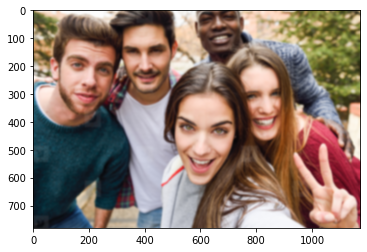

In [152]:
out_img = []
for c in range(image4.shape[2]):
    out_img.append(corr2(image4[:,:,c], w, mode='valid'))
out_img = np.stack(out_img, axis=2)
plt.imshow(out_img)

Сделаем негатив

In [159]:
image5 = np.copy(image)

In [167]:
for c in range(image5.shape[2]):
      image5[:,:,c]  = 255-image5[:,:,c]


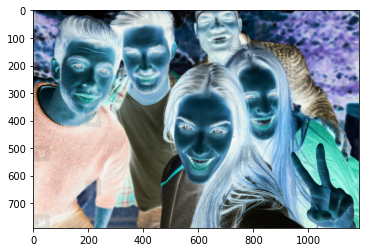

In [168]:
plt.imshow(image5)

Сделаем черно-белую картинку

In [178]:
image6 = np.copy(image)

In [181]:
for h in range(image6.shape[0]):
    for w in range(image6.shape[1]):
      for l in range(image6.shape[2]):
        if image6[h,w,l] <=125:
           image6[h,w,l] = 0
        else:
           image6[h,w,l] = 255

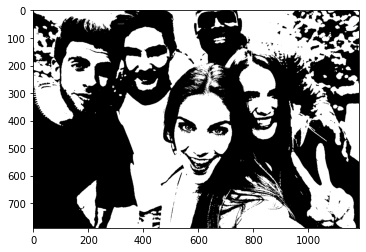

In [193]:
plt.imshow(image6[:,:,1], cmap='gray')